# Visión por Computadora I - CEIA 2024 - Coh17 

### Trabajo Práctico 1

Integrantes:

Agustín de la Vega (delavega.agus@gmail.com)

Agustina Quiros (agustinaqr@gmail.com)

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Parte 1

### 1.

In [3]:
def rgb_to_chromatic(img):
  img = img / 255.0

  r, g, b = cv2.split(img)
  sum_rgb = r + g + b
  sum_rgb[sum_rgb == 0] = 1

  chromatic_r = (r / sum_rgb) * 255.0
  chromatic_g = (g / sum_rgb) * 255.0
  chromatic_b = (b / sum_rgb) * 255.0

  return cv2.merge((chromatic_r, chromatic_g, chromatic_b))

### 2.

In [4]:
def white_patch(img):
  r, g, b = cv2.split(img)

  max_r = np.max(r)
  max_g = np.max(g)
  max_b = np.max(b)

  white_patch_r = (255 / max_r) * r
  white_patch_g = (255 / max_g) * g
  white_patch_b = (255 / max_b) * b

  return cv2.merge((white_patch_r, white_patch_g, white_patch_b))

### 3.

In [5]:
def plot_coord_chromatic(img_path):
  img = cv2.imread(img_path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  chromatic_img = rgb_to_chromatic(img_rgb)

  plt.figure(figsize=(15, 5))

  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title('Original Image')

  plt.subplot(1, 2, 2)
  plt.imshow(np.array(chromatic_img,np.int32))
  plt.title('Chromatic Image')
  
  plt.show()

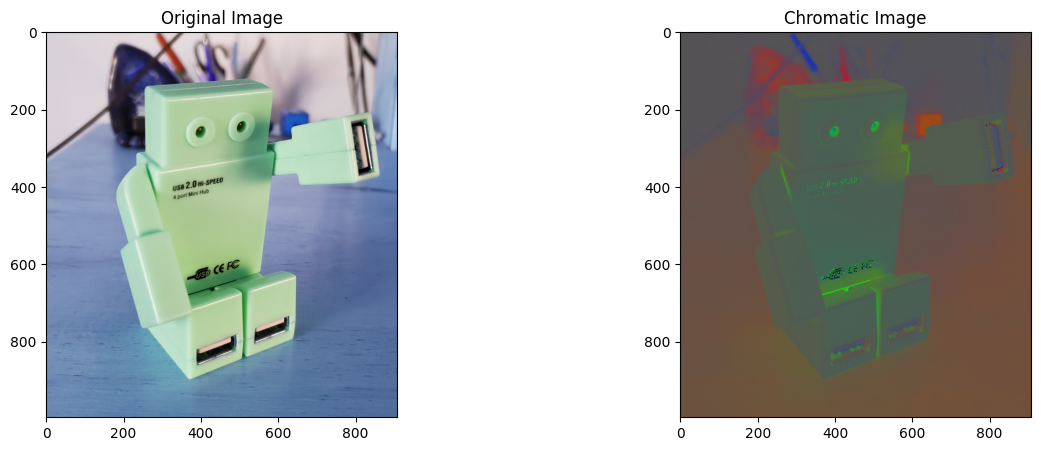

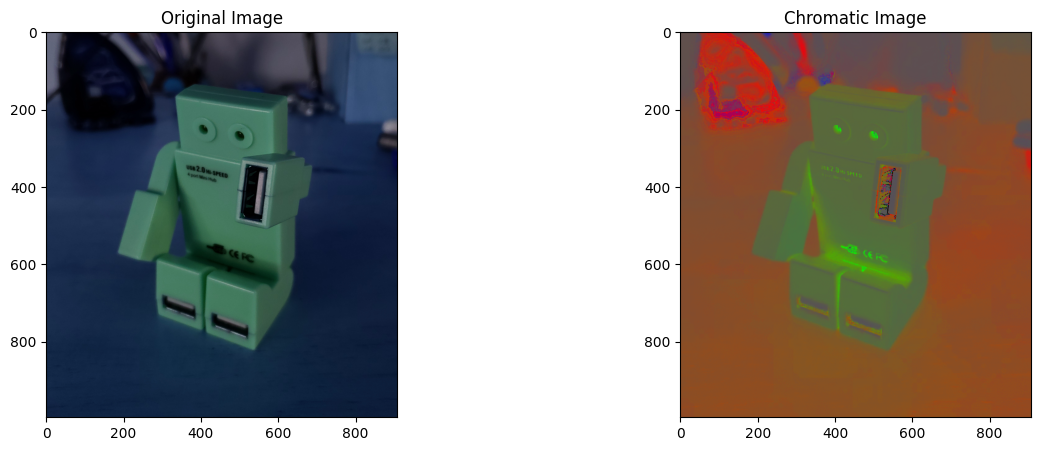

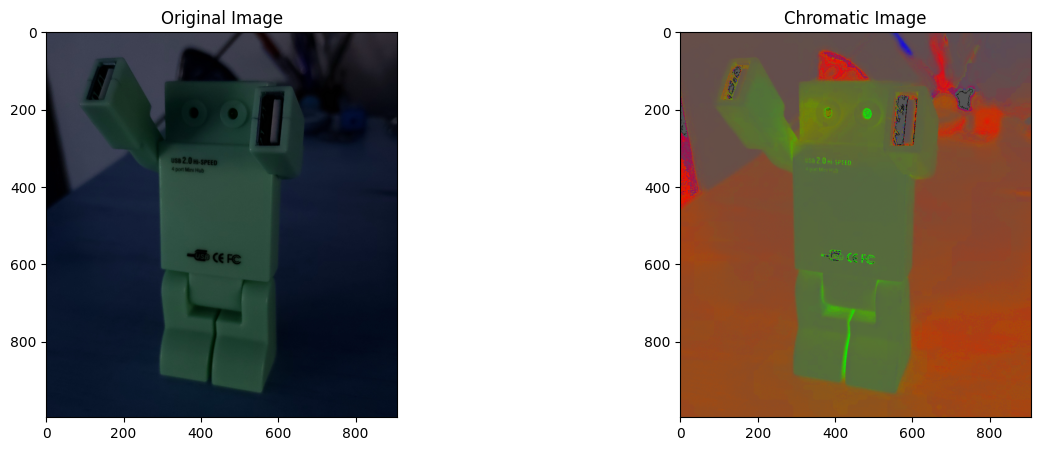

In [6]:
for i in range(1, 4):
  image_path = f'./data/coord_cromaticas/CoordCrom_{i}.png'
  plot_coord_chromatic(image_path)

In [23]:
def save_processed_image(img, save_path, filename):
    os.makedirs(save_path, exist_ok=True) 
    processed_filename = f"processed_{filename}"
    processed_image_path = os.path.join(save_path, processed_filename)

    img_uint8 = np.clip(img, 0, 255).astype(np.uint8)

    cv2.imwrite(processed_image_path, cv2.cvtColor(img_uint8, cv2.COLOR_RGB2BGR))


In [24]:
def plot_white_patch(img_path, save_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    white_patch_img = white_patch(img_rgb)

    save_processed_image(white_patch_img, save_path, os.path.basename(img_path))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(np.array(white_patch_img,np.int32))
    plt.title('White Patch Image')

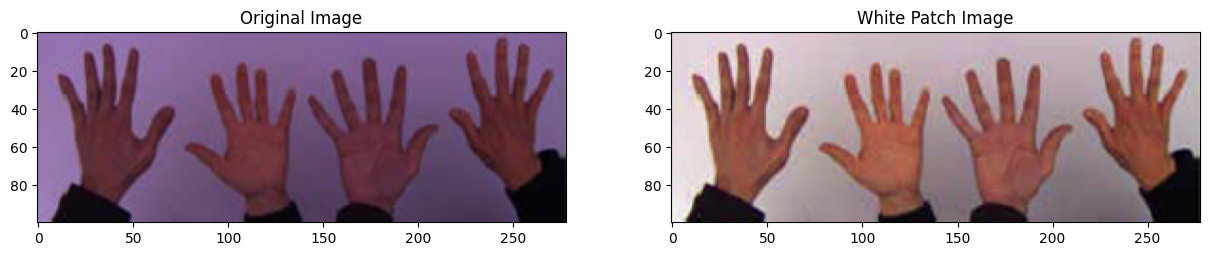

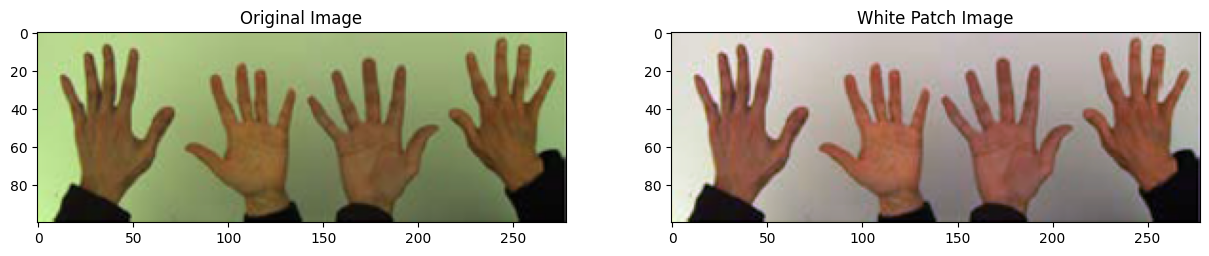

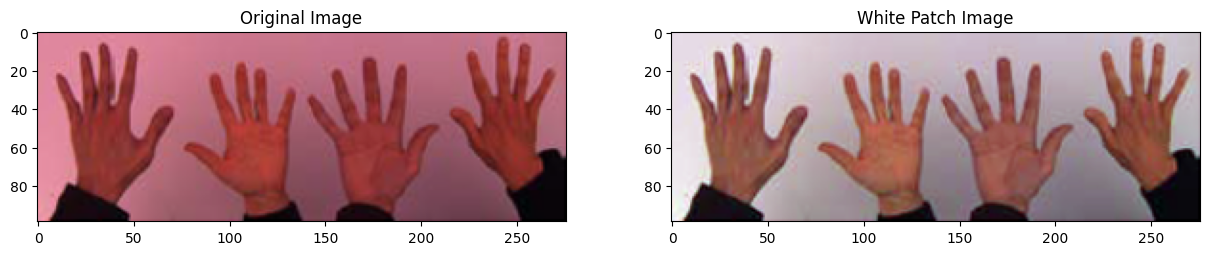

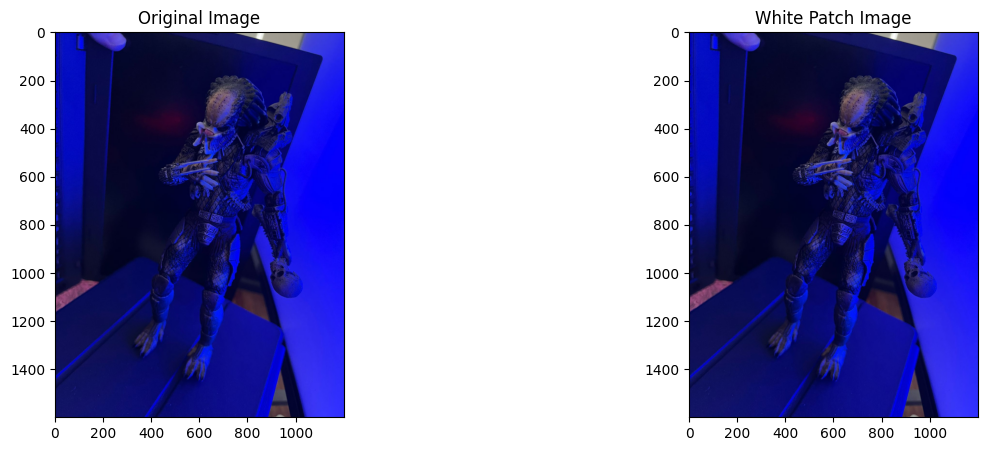

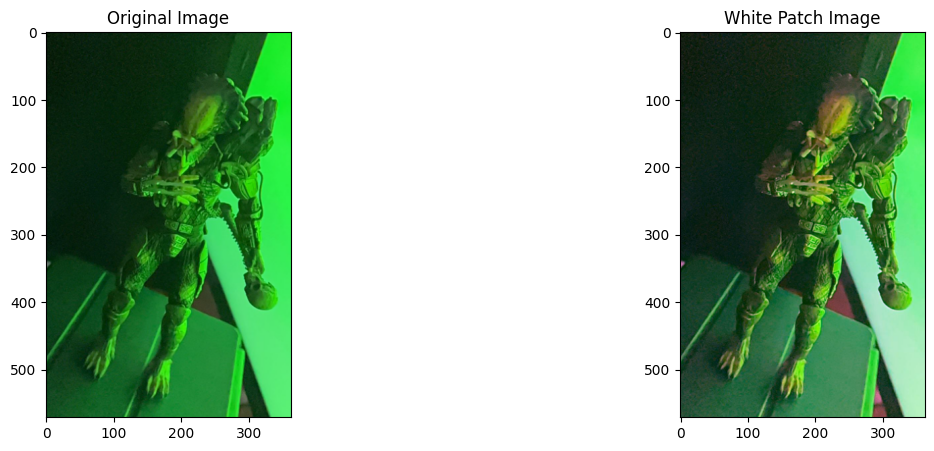

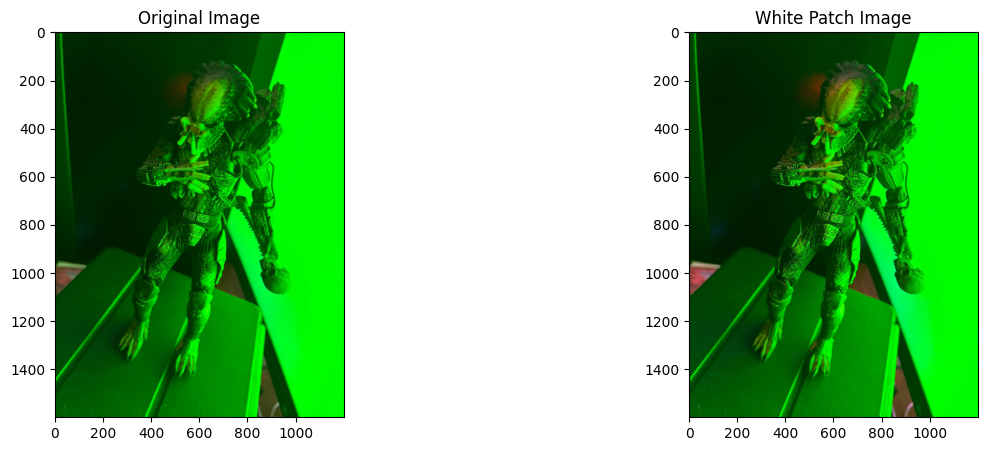

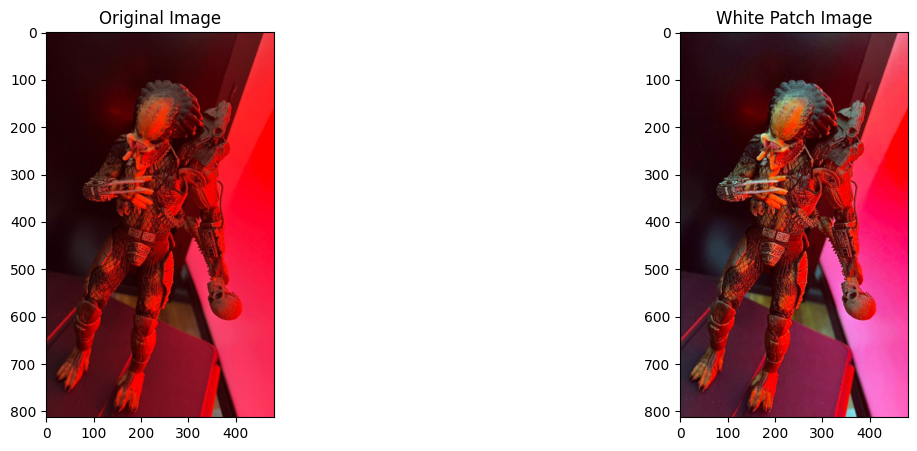

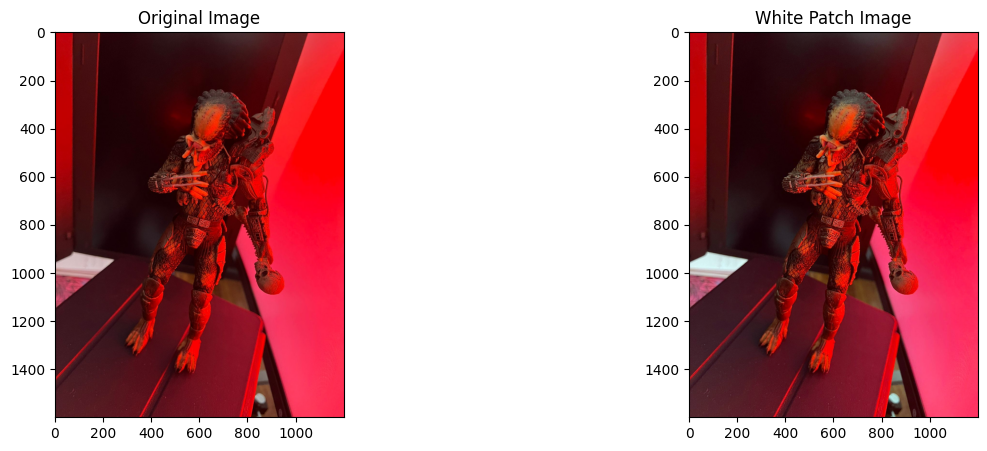

In [25]:
processed_images_folder = './data/processed_images'

image_names = os.listdir('./data/white_patch')
for image_name in image_names:
    plot_white_patch(f'./data/white_patch/{image_name}', processed_images_folder)


### Posibles fallas - Histogramas 2D

Para analizar las posibles fallas, realizaremos histogramas 2D entre los canales RGB que aportan información importante que no es fácil de ver en la imagen original.


In [51]:
def plot_2d_histogram(ax, image, image_name):
    b, _, r = cv2.split(image)
    hist = cv2.calcHist([r, b], [0, 1], None, [256, 256], [0, 256, 0, 256])
    hist = cv2.normalize(hist, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    
    ax.imshow(hist, interpolation='nearest', origin='lower', cmap='hot')
    ax.set_title(f'{image_name}') 
    ax.set_xlabel('Red')
    ax.set_ylabel('Blue')
    ax.grid(False)

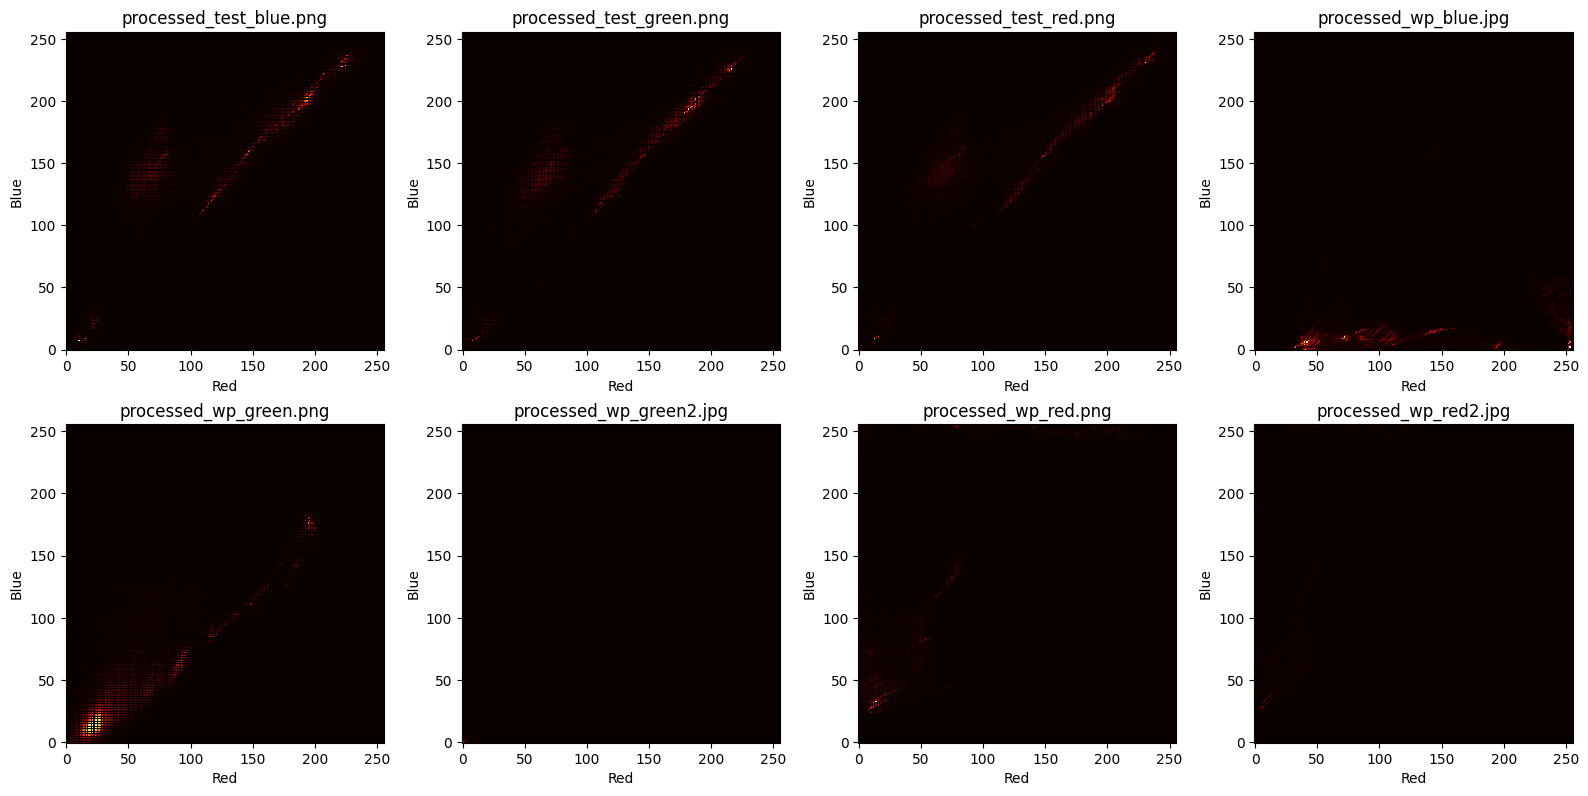

In [52]:
img_p = os.listdir(processed_images_folder)

num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
axes = axes.ravel()  # matriz de subplots en una lista 

for i, image_file in enumerate(img_p[:8]):  
    img_path = os.path.join(processed_images_folder, image_file)
    img = cv2.imread(img_path)
    
    if img is not None:  
        plot_2d_histogram(axes[i], img, image_file)

plt.tight_layout()
plt.show()

Analizamos los gráficos entre los canales Azul y Rojo

_Primer fila_ 

- En los primeros tres histogramas se observa **alta correlación** entre los valores de intensidad de ambos canales.
- En el cuarto gráfico podemos ver como **predomina** el rango dinámico del canal rojo representado en el eje X, es mayor al rango del eje Y que corresponde al canal azul.

_Segunda fila_

- En el primer gráfico se observa **alta correlación** entre los valores de intensidad de ambos canales.
- Hay gráficos que quedan totalmente oscuros ya que corresponden al color verde.

## Parte 2

### 1.

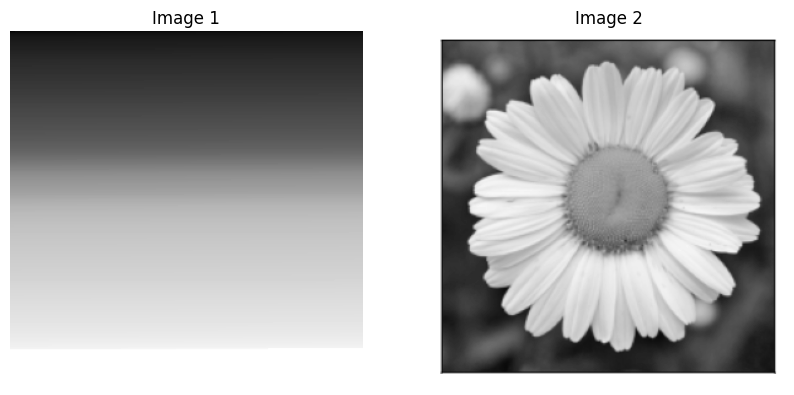

In [9]:
img1 = cv2.imread('data/img1_tp.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('data/img2_tp.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

# Show second image
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Image 2')
plt.axis('off')

plt.show()

### 2.

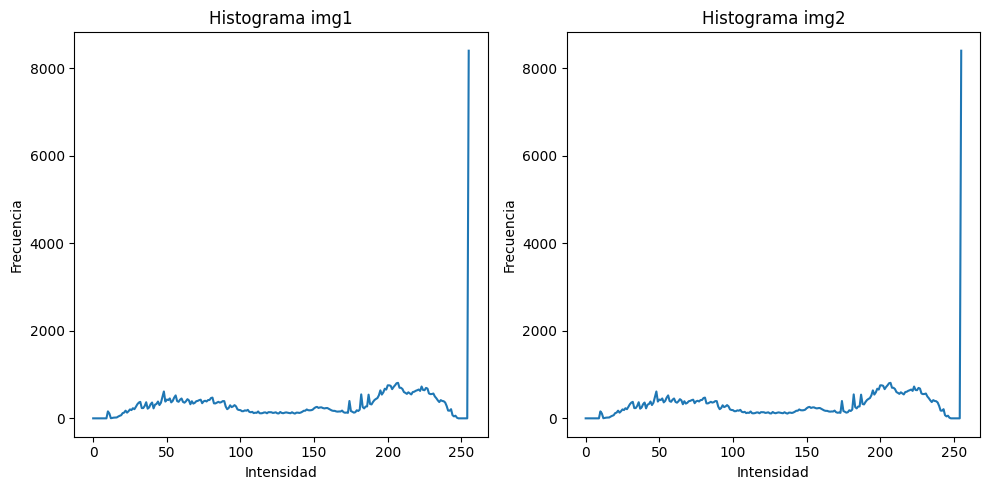

In [10]:
hist1, bins1 = np.histogram(img1.ravel(), 256, [0, 256])
hist2, bins2 = np.histogram(img2.ravel(), 256, [0, 256])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Histograma img1')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.plot(bins1[:-1], hist1)

plt.subplot(1, 2, 2)
plt.title('Histograma img2')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.plot(bins2[:-1], hist2)

plt.tight_layout()
plt.show()

Se observan dos histogramas identicos

**Img1**:La primer imagen tiene una banda blanca sobre el final, la cual provocaria este pico en 255

**Img2**:La segunda imagen tiene una gran presencia del color blanco en los petalos y en el "marco"

Este ejemplo muestra claramente que el histograma no puede ser seleccionado como feature para clasificar o detectar las imagenes. Ambas imagenes contarian con los mismos valores para esta feature pero en la realidad representan dos objetos completamente diferentes.


### 3.

In [11]:
def plot_img(img):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 1, 1)
    plt.imshow(img)
    plt.axis('off')

    plt.show()

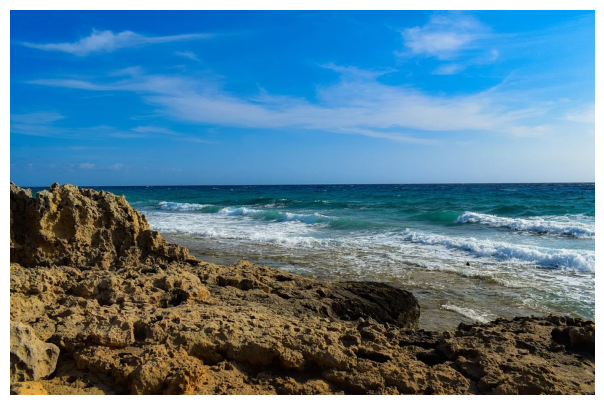

In [12]:
image = cv2.imread('data/segmentacion.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plot_img(image_rgb)

#### Histogramas RGB

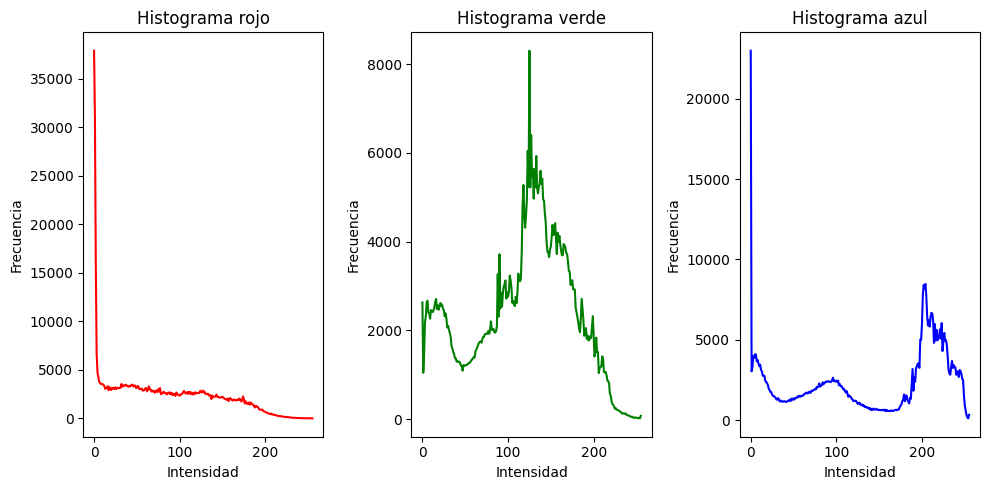

In [13]:
b, g, r = cv2.split(image)

hist_r, bins_r = np.histogram(r.ravel(), 256, [0, 256])
hist_g, bins_g = np.histogram(g.ravel(), 256, [0, 256])
hist_b, bins_b = np.histogram(b.ravel(), 256, [0, 256])

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Histograma rojo')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.plot(bins_r[:-1], hist_r, color='red')

plt.subplot(1, 3, 2)
plt.title('Histograma verde')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.plot(bins_g[:-1], hist_g, color='green')

plt.subplot(1, 3, 3)
plt.title('Histograma azul')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.plot(bins_b[:-1], hist_b, color='blue')

plt.tight_layout()
plt.show()

In [14]:
def segment_by_rgb(roi, sigma=3):
  color_mean, color_std = cv2.meanStdDev(roi)
  mask = cv2.inRange(image, color_mean-color_std * sigma,  color_mean+color_std * sigma)
  segmented_image = cv2.bitwise_and(image, image, mask=mask)
  return segmented_image

#### Cielo

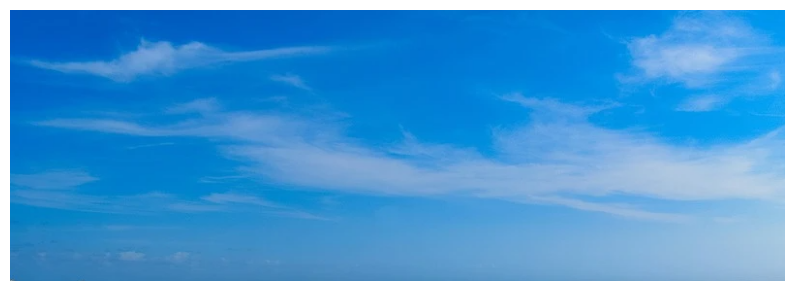

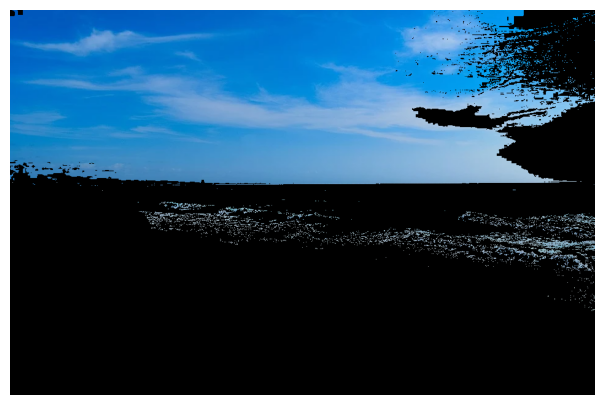

In [15]:
sky_roi = image[0:280, 0:800]
plot_img(cv2.cvtColor(sky_roi, cv2.COLOR_BGR2RGB))
segmented_sky = segment_by_rgb(sky_roi, 2.2)
plot_img(cv2.cvtColor(segmented_sky, cv2.COLOR_BGR2RGB))

#### Agua

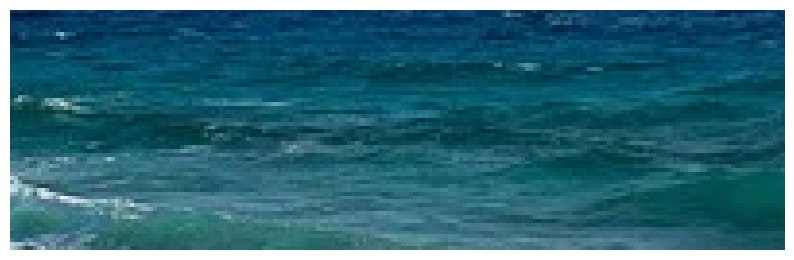

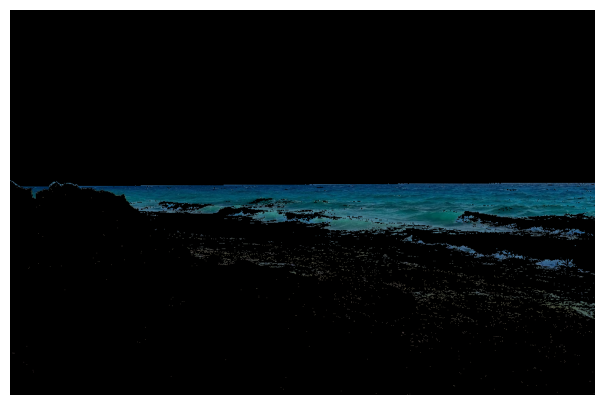

In [16]:
sea_roi = image[288:350, 500:700]
plot_img(cv2.cvtColor(sea_roi, cv2.COLOR_BGR2RGB))
segmented_sea = segment_by_rgb(sea_roi, 2.2)
plot_img(cv2.cvtColor(segmented_sea, cv2.COLOR_BGR2RGB))

#### Histogramas HSV

In [17]:
def plot_hsv_histograms(img):
  hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  h, s, v = cv2.split(hsv_image)

  hist_h, bins_h = np.histogram(h.ravel(), 256, [0, 256])
  hist_s, bins_s = np.histogram(s.ravel(), 256, [0, 256])
  hist_v, bins_v = np.histogram(v.ravel(), 256, [0, 256])

  plt.figure(figsize=(15, 5))

  plt.subplot(1, 3, 1)
  plt.title('Histograma Hue')
  plt.xlabel('Hue')
  plt.ylabel('Frecuencia')
  plt.plot(bins_h[:-1], hist_h, color='red')

  plt.subplot(1, 3, 2)
  plt.title('Histograma Saturation')
  plt.xlabel('Saturation')
  plt.ylabel('Frecuencia')
  plt.plot(bins_s[:-1], hist_s, color='green')

  plt.subplot(1, 3, 3)
  plt.title('Histograma Value')
  plt.xlabel('Value')
  plt.ylabel('Frecuencia')
  plt.plot(bins_v[:-1], hist_v, color='blue')

  plt.tight_layout()
  plt.show()

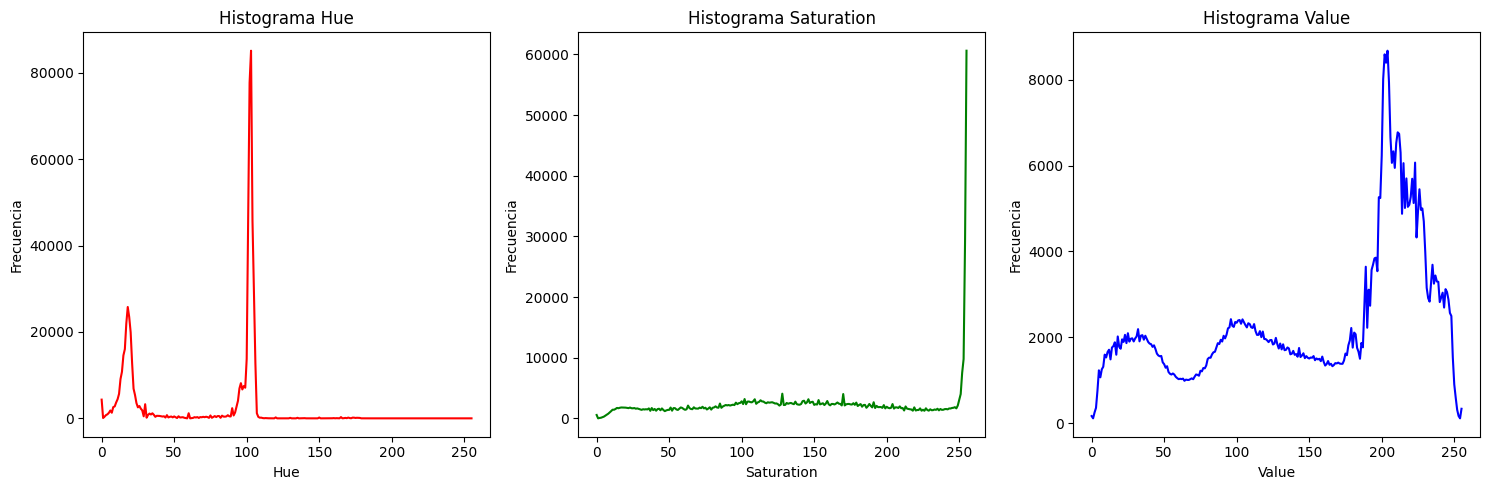

In [18]:
plot_hsv_histograms(image)

In [19]:
def segment_by_hsv(image, min_hsv=[0, 0, 0], max_hsv=[255, 255, 255]):
  hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  lower_bound = np.array(min_hsv)
  upper_bound = np.array(max_hsv)

  mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

  return cv2.bitwise_and(image, image, mask=mask)

#### Tierra

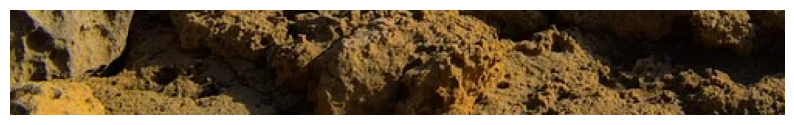

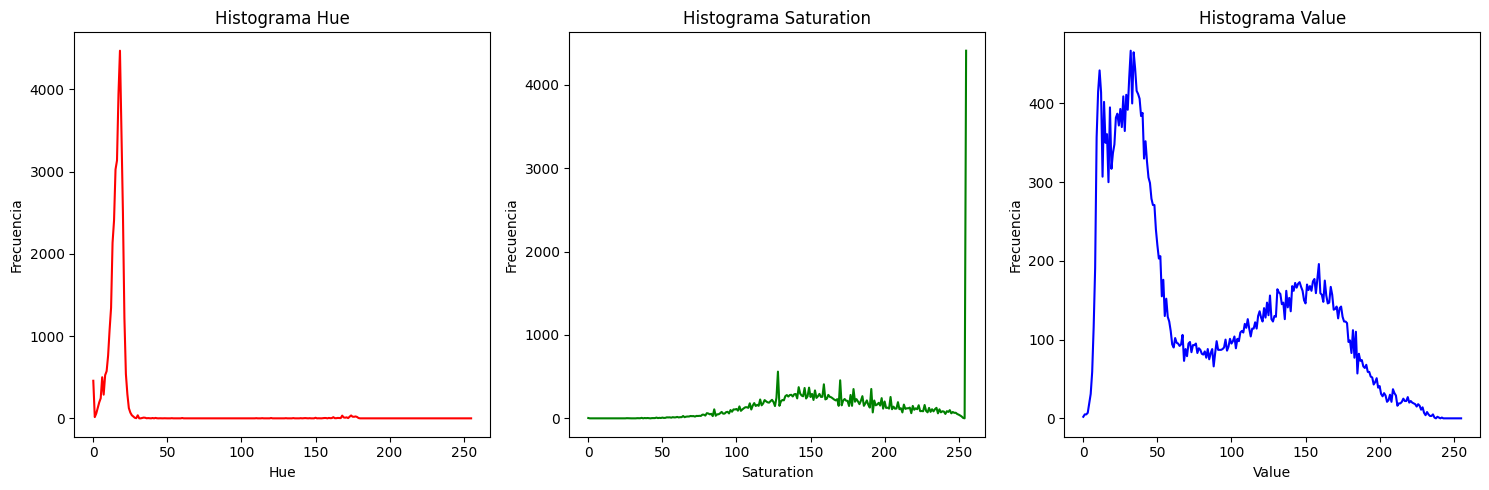

In [20]:
land_roi = image[560:628, 0:500]
plot_img(cv2.cvtColor(land_roi, cv2.COLOR_BGR2RGB))
plot_hsv_histograms(land_roi)

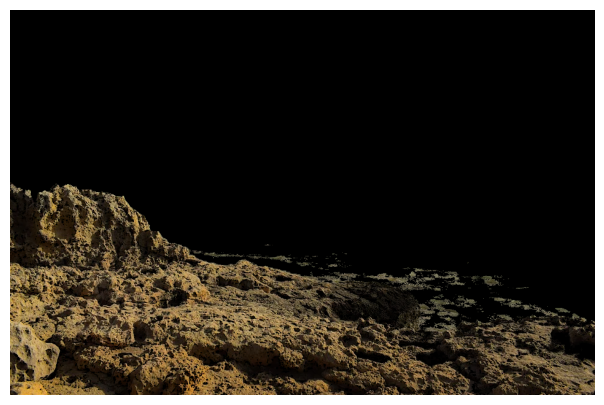

In [21]:
segmented_land = segment_by_hsv(image,[0, 50, 0], [35, 250, 255])
plot_img(cv2.cvtColor(segmented_land, cv2.COLOR_BGR2RGB))